# Lab 8 : Star Formation 

In [3]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [74]:
def StarFormationRate(L, Type, TIR=0):
    """
    This function calculates the star formation rate of a galaxy using 
    Kennicutt & Evans 2012 Eqn 12 (ARA&A 50).
    
    Parameters
    ----------
    L: float
        luminosity of galaxy in a given waveband in erg/s
    
    Type: string
        string describe the wavelength: "NUV", "FUV", "TIR", or "Halpha"
    
    TIR: float
        total infrared luminosity in erg/s, default: TIR=0
        
    Returns
    -------
    sfr: float
        log SFR in Msun/year
    """
    
    # Defining a dictionary that makes it easier to find log Cx value for particular luminosity type:
    dic = {"NUV":[43.17,0.27], "FUV":[43.35,0.46], "TIR":[43.41,0], "Halpha":[41.27,0.0024]}
    
    if Type in dic.keys():
        # Saving log Cx for given luminosity type:
        log_cx, TIRc = dic[Type][0], dic[Type][1]
    else:
        print("Missing Wavelength: FUV, NUV, TIR, Halpha.")
    
    # Correcting luminosity for dust using TIR
    Lnew = L + TIRc*TIR
    
    # Finding SFR:
    sfr = np.log10(Lnew) - log_cx
    
    return sfr    

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [75]:
# Defining a constant that helps converts Lsun to erg/s
LsunErgS = const.L_sun.to(u.erg/u.s).value
LsunErgS

3.828e+33

In [76]:
#  WLM Dwarf Irregular Galaxy

# From NED, WLM NUV luminosity = 1.71e7 Lsun
# From NED, WLM NIR luminosity = 2.48e6 Lsun
# From NED, WLM FIR luminosity = 7.84e5 Lsun

# WLM luminosities in erg/s
NUV_WLM = 1.71e+07*LsunErgS    
TIR_WLM = (2.48e6 + 7.84e5)*LsunErgS

SFR_WLM = StarFormationRate(NUV_WLM, "NUV", TIR_WLM)  # finding SFR(UV) for WLM
print(SFR_WLM)         #Lee et al. 2009 shows that SFR(UV) = -2.2, quite close!

-2.3322074670824904


In [79]:
#  NGC 24 Sc galaxy


# From NED, NGC 24 NUV luminosity = 2.96e+08 Lsun
# From NED, NGC 24 NIR luminosity = 8.34e+08 Lsun
# From NED, NGC 24 FIR luminosity = 3.09E+08 Lsun

# NGC 24 luminosities in erg/s
NUV_N24 = 2.96e+08*LsunErgS    
TIR_N24 = (8.34e+08 + 3.09E+08)*LsunErgS

SFR_N24 = StarFormationRate(NUV_N24, "NUV", TIR_N24)  # finding SFR(UV) for N24
print(SFR_N24)         #Lee et al. 2009 shows that SFR(UV) = -0.70, quite close again!

-0.8055527449424105


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [84]:
def SFRMainSequence(Mstar, z):
    """
    This function calculates the average SFR of a galaxy as a function of its stellar mass using Eqn from Whitaker 2012.
    
    Parameter
    ---------
    Mstar: float
        stellar mass of the galaxy in Msun
    
    z: float
        redshift of the galaxy
    
    Return
    ------
    logSFR: float
        average star formation rate of the galaxy in log Msun/year
    """
    
    alpha = 0.7 - 0.13*𝑧
    beta = 0.38 + 1.14*𝑧 - 0.19 * 𝑧**2
    
    logSFR =  alpha* ( np.log10(𝑀star) - 10.5 ) + beta   # From Whitaker 2012
    
    return logSFR

# Step 2

In [87]:
# MW at z=0

MWdisk = 8e10

print(10**SFRMainSequence(MWdisk, 0))

4.5937038237959715


In [88]:
# MW at z = 1

print(10**SFRMainSequence(MWdisk, 1))

36.287854588142594


# Step 3

In [89]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

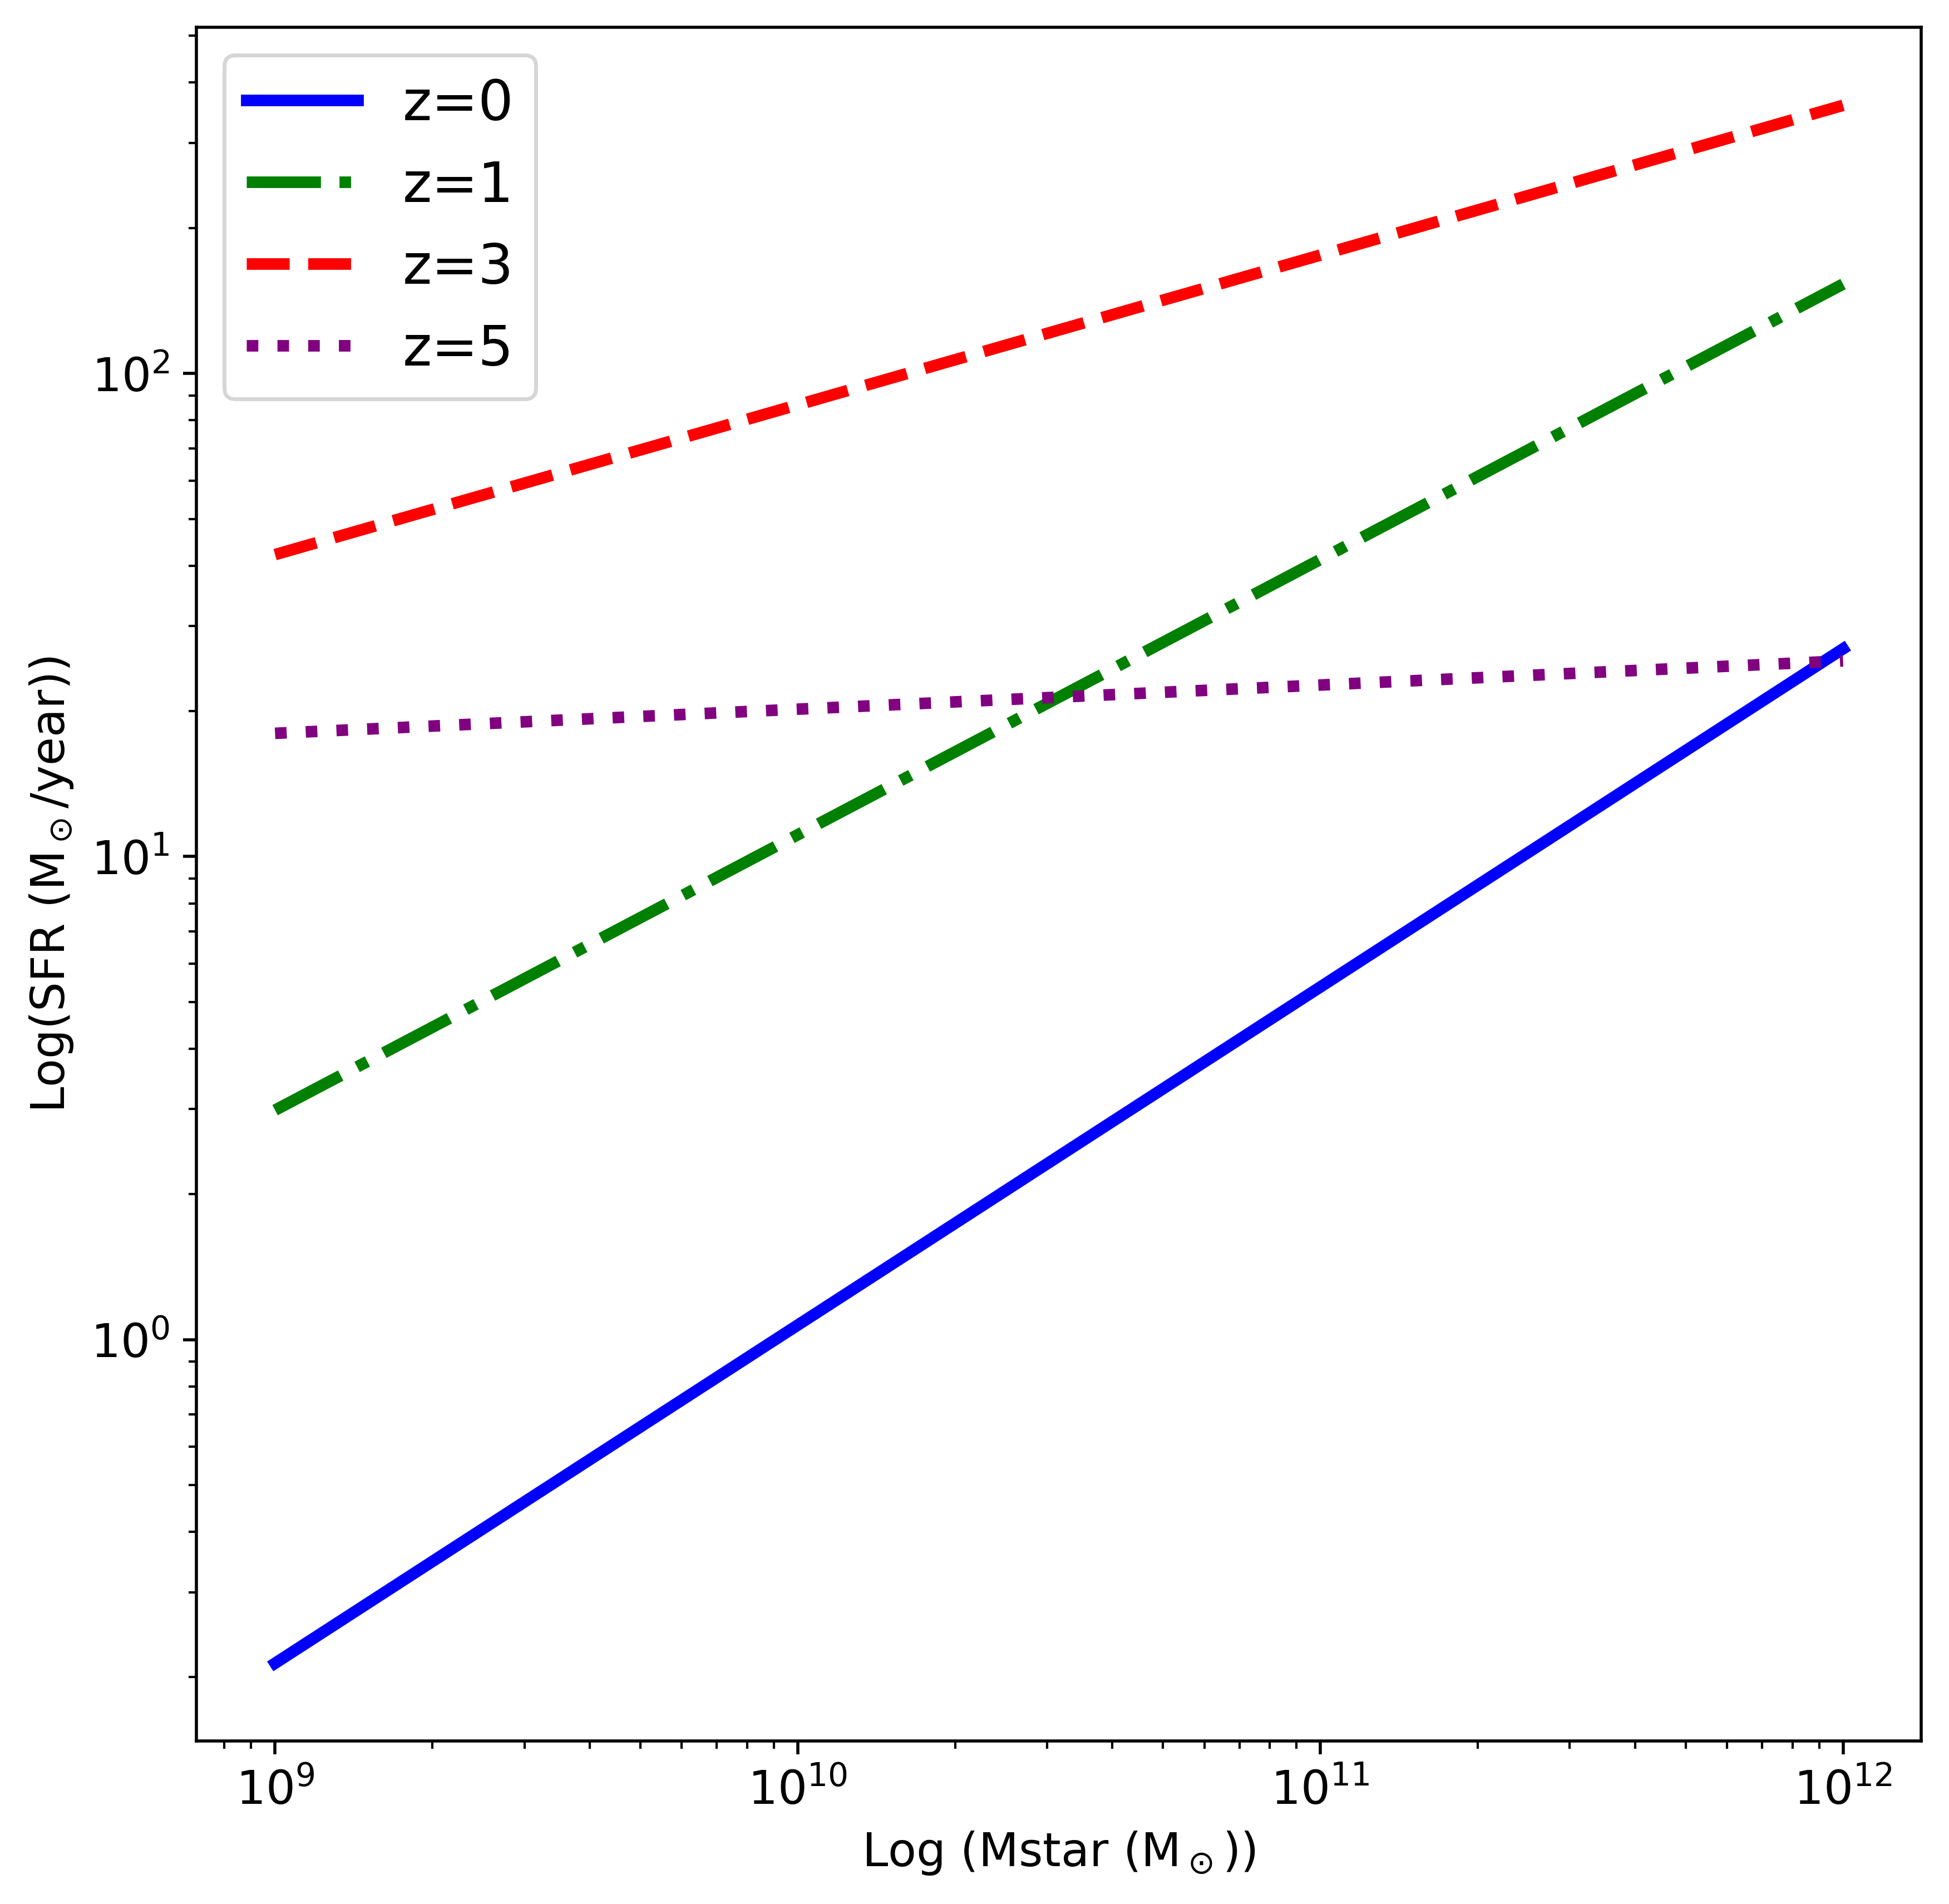

In [95]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass,0), color='blue', linewidth=3, label="z=0")
plt.loglog(Mass, 10**SFRMainSequence(Mass,1), color='green', linestyle="-.",linewidth=3, label="z=1")
plt.loglog(Mass, 10**SFRMainSequence(Mass,3), color='red', linestyle="--",linewidth=3, label="z=3")


plt.loglog(Mass, 10**SFRMainSequence(Mass,5), color='purple', linestyle=":",linewidth=3, label="z=5")
#plt.loglog(Mass, 10**SFRMainSequence(Mass,12), color='hotpink', linestyle="--",linewidth=3, label="z=12")

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [96]:
# normal galaxies 
TIR_Normal = 1e10*LsunErgS

print(10**StarFormationRate(TIR_Normal, "TIR"))

1.4892648150381245


In [97]:
# LIRGs  
TIR_LIRG = 1e11*LsunErgS

print(10**StarFormationRate(TIR_LIRG, "TIR"))

14.892648150381245


In [98]:
# ULIRGs
TIR_ULIRG = 1e12*LsunErgS

print(10**StarFormationRate(TIR_ULIRG, "TIR"))

148.92648150381245


In [99]:
# HLIRGs
TIR_HLIRG = 1e13*LsunErgS

print(10**StarFormationRate(TIR_HLIRG, "TIR"))

1489.2648150381244
